## HR ANALYTICS EXPERIMENT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train1 = train.drop(['employee_id'],1)

### Descriptive Statistics:


In [7]:
train1.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Exploratory Analysis:


#### Univariate Analysis (Continuous and Categorical):

In [8]:
train1['is_promoted'].value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

### Target Variable has highly Imbalanced data. will use SMOTE Technique.


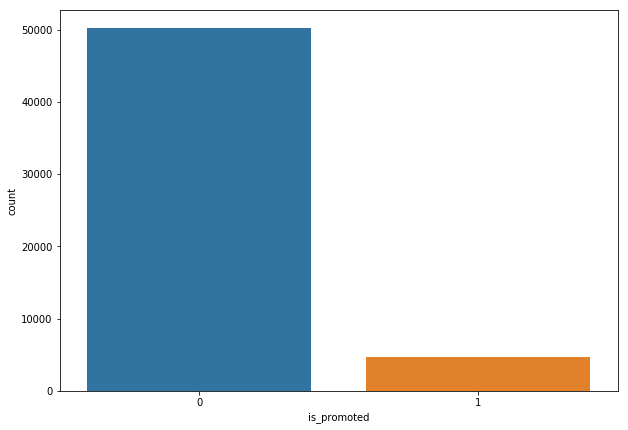

In [9]:
plt.figure(figsize = (10,7))
sns.countplot(train1['is_promoted'])
plt.show()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


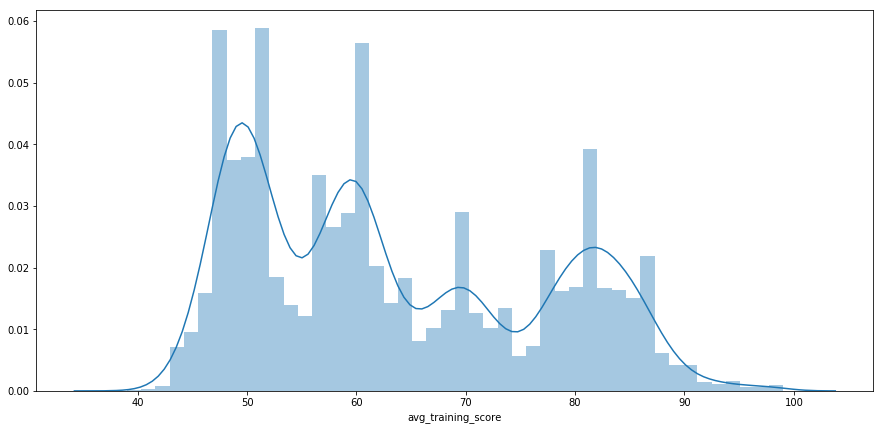

In [10]:
plt.figure(figsize = (15,7))
sns.distplot(train1['avg_training_score'])
plt.show()

In [11]:
train1['awards_won?'].value_counts(normalize = True)

0    0.976828
1    0.023172
Name: awards_won?, dtype: float64

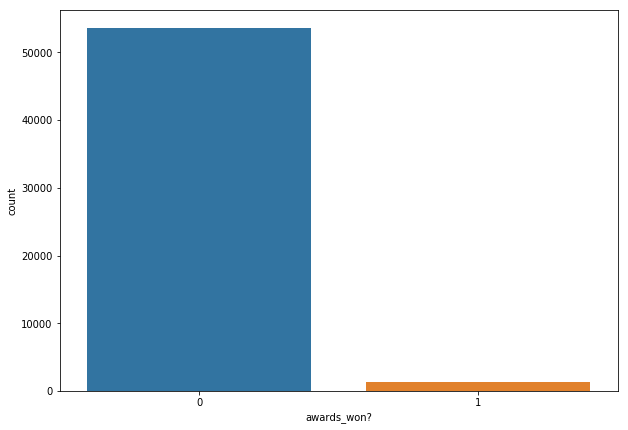

In [12]:
plt.figure(figsize = (10,7))
sns.countplot(train1['awards_won?'])
plt.show()

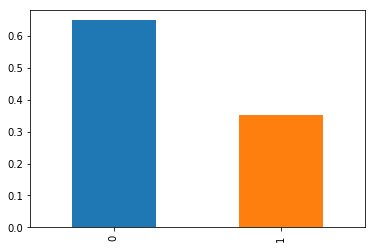

In [13]:
train1['KPIs_met >80%'].value_counts(normalize = True).plot.bar()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


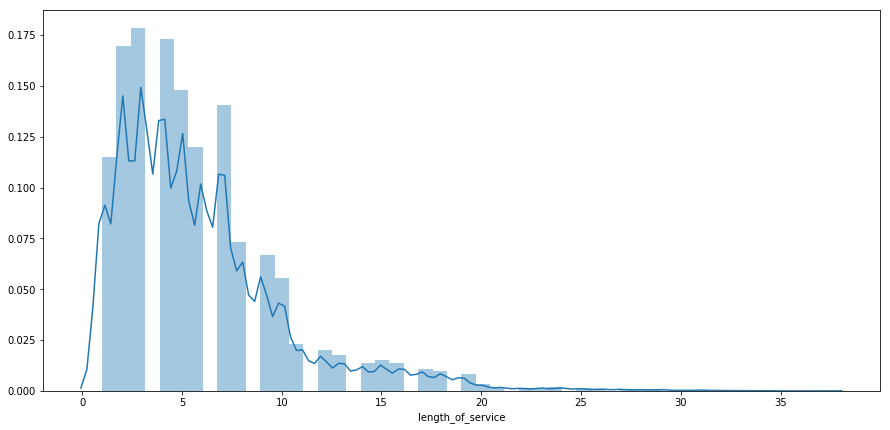

In [14]:
plt.figure(figsize = (15,7))
sns.distplot(train1['length_of_service'])
plt.show()

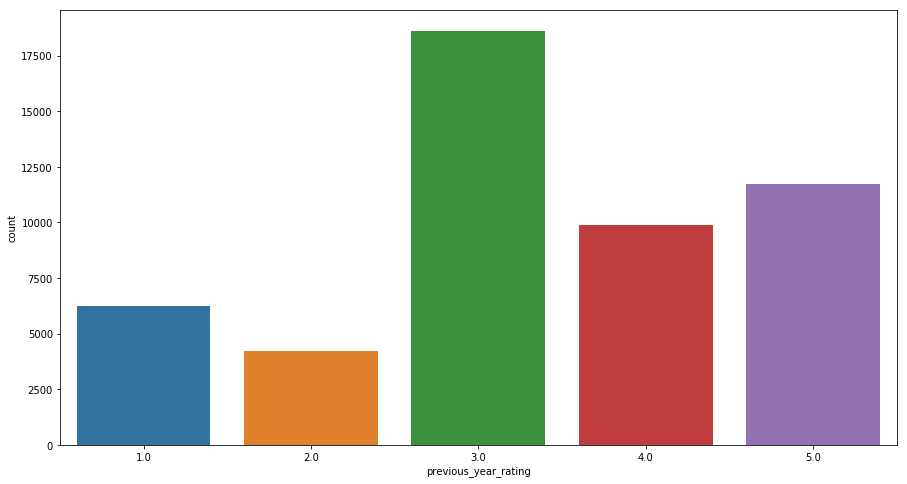

In [15]:
plt.figure(figsize = (15,8))
sns.countplot(train1['previous_year_rating'])
plt.show()

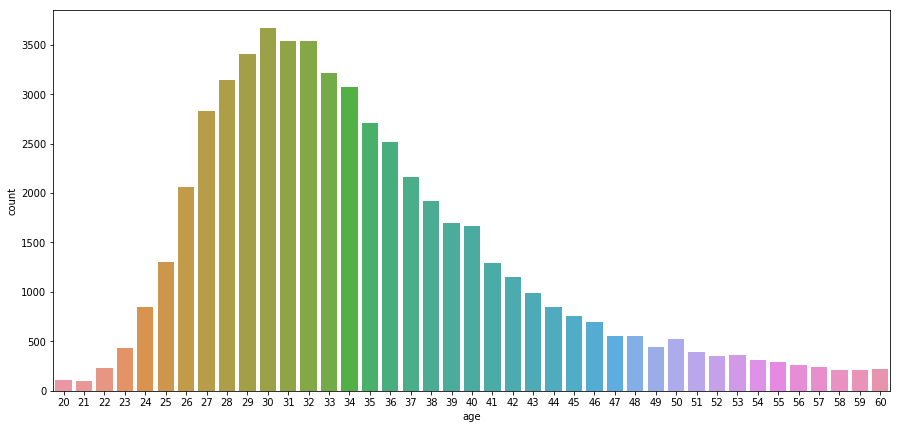

In [16]:
plt.figure(figsize = (15,7))
sns.countplot(train1['age'])
plt.show()

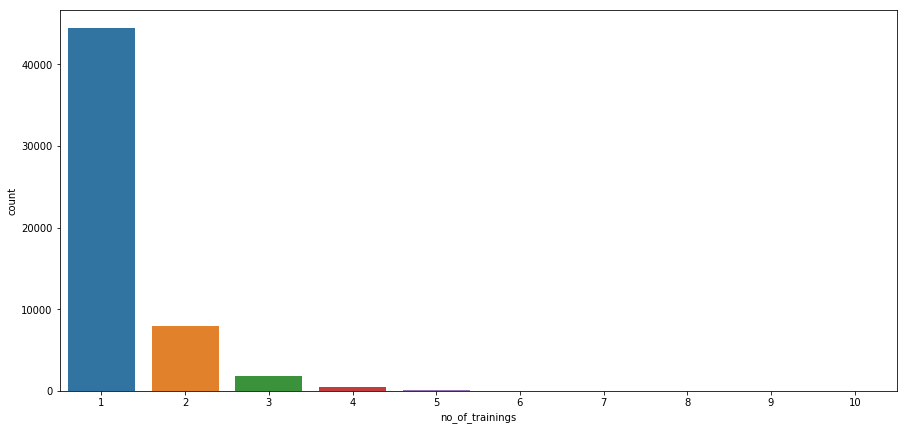

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(train1['no_of_trainings'])
plt.show()

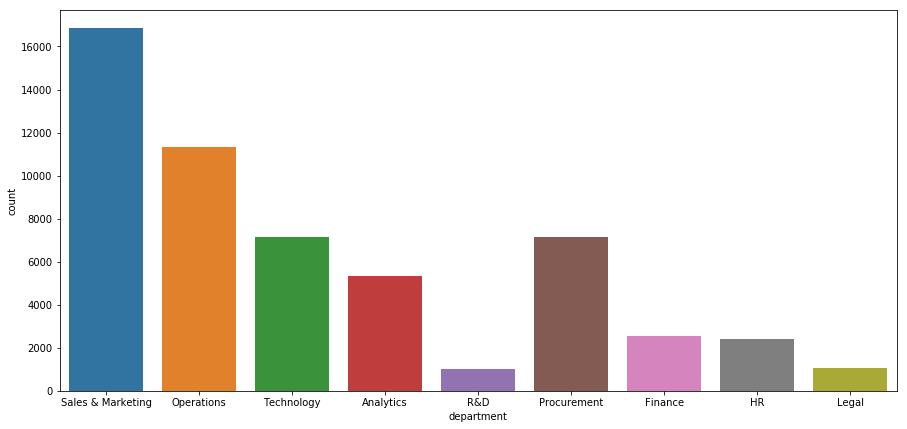

In [18]:
plt.figure(figsize = (15,7))
sns.countplot(train1['department'])
plt.show()

### Bivariate Analysis:

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


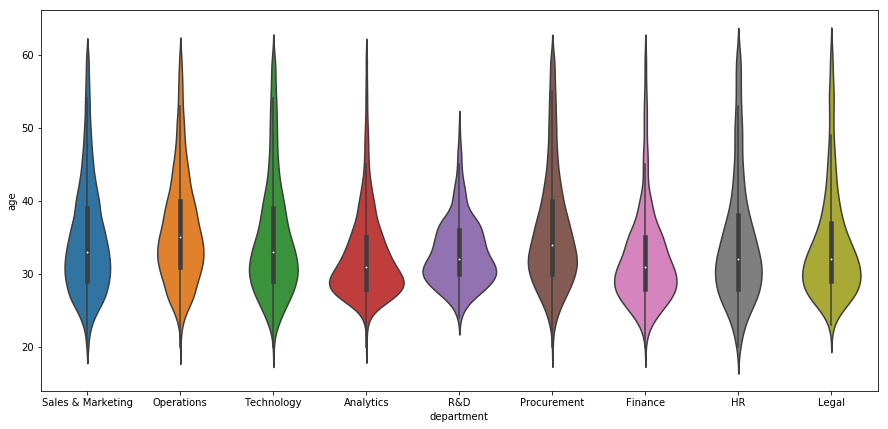

In [19]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['age'], data = train1)
plt.show()

In [20]:
train1.groupby(['department']).age.mean().sort_values(ascending = True)

department
Finance              32.058754
Analytics            32.431241
R&D                  32.842843
Legal                33.832531
HR                   34.385856
Sales & Marketing    34.860629
Technology           34.867190
Procurement          35.899972
Operations           36.073669
Name: age, dtype: float64

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


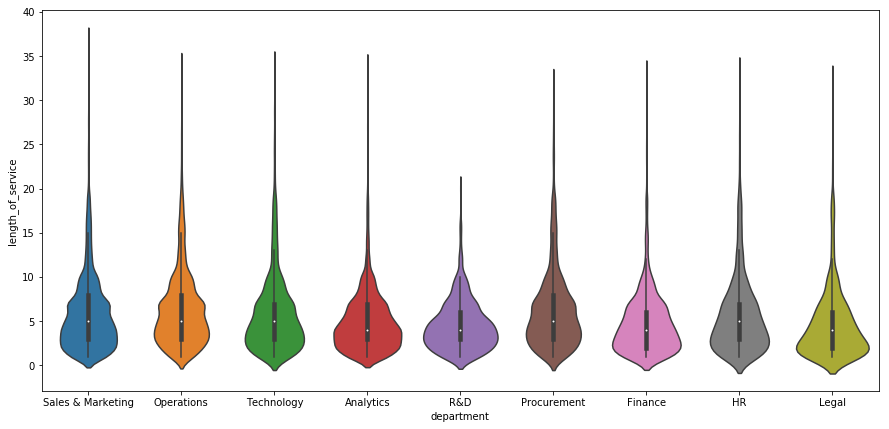

In [21]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['length_of_service'], data = train1)
plt.show()

In [22]:
train1.groupby(['department']).length_of_service.mean().sort_values(ascending = True)

department
R&D                  4.554555
Legal                4.599615
Finance              4.819401
Analytics            4.932735
HR                   5.683623
Sales & Marketing    5.912292
Technology           5.914822
Procurement          6.331045
Operations           6.416020
Name: length_of_service, dtype: float64

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


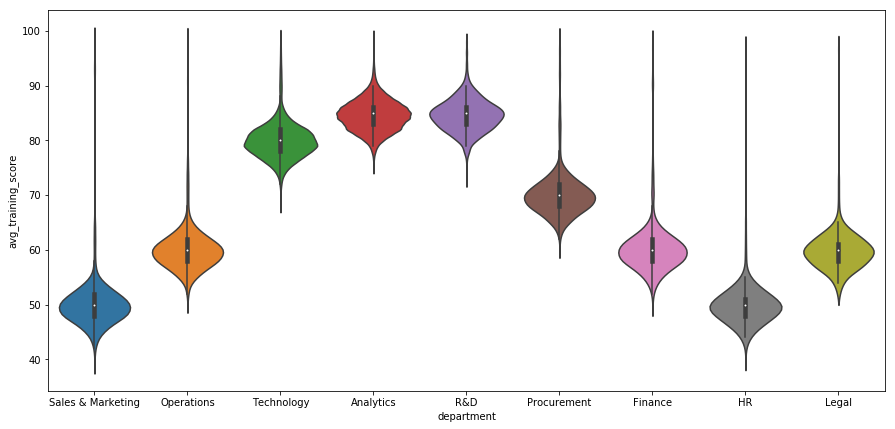

In [23]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['avg_training_score'], data = train1)
plt.show()

In [24]:
train1.groupby(['department']).avg_training_score.mean().sort_values(ascending = True)

department
HR                   50.018197
Sales & Marketing    50.261698
Legal                59.868142
Finance              60.222003
Operations           60.226648
Procurement          70.122443
Technology           79.928692
R&D                  84.596597
Analytics            84.602952
Name: avg_training_score, dtype: float64

#### Education Backgrounds of Departments:

In [25]:
pd.crosstab(train1['education'],train1['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
education,,,,,,,,,
Bachelor's,3978,1895,1525,814,7781,4393,542,11099,4642
Below Secondary,0,106,128,65,176,129,0,0,201
Master's & above,1037,499,733,156,3165,2544,429,4166,2196


In [26]:
pd.crosstab(train1['recruitment_channel'],train1['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
recruitment_channel,,,,,,,,,
other,2973,1463,1380,590,6279,4002,555,9290,3914
referred,83,5,103,14,238,79,19,259,342
sourcing,2296,1068,935,435,4831,3057,425,7291,2882


In [27]:
pd.crosstab(train1['gender'],train1['education'])

education,Bachelor's,Below Secondary,Master's & above
gender,,,
f,10854,289,4778
m,25815,516,10147


G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


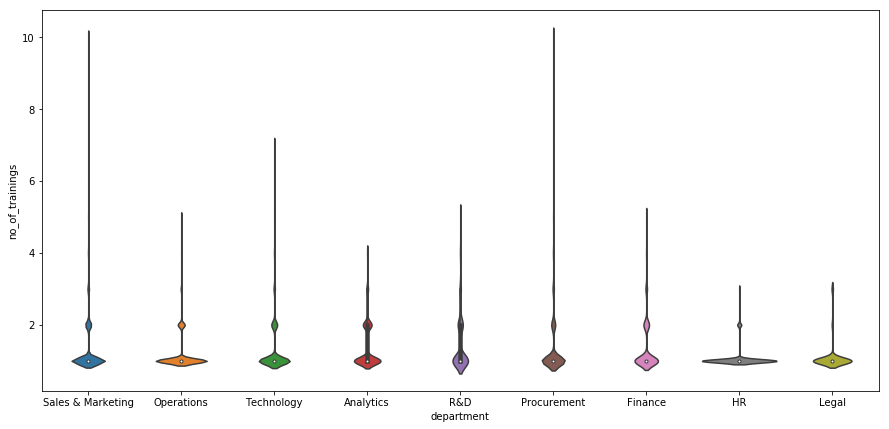

In [28]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['no_of_trainings'], data = train1)
plt.show()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


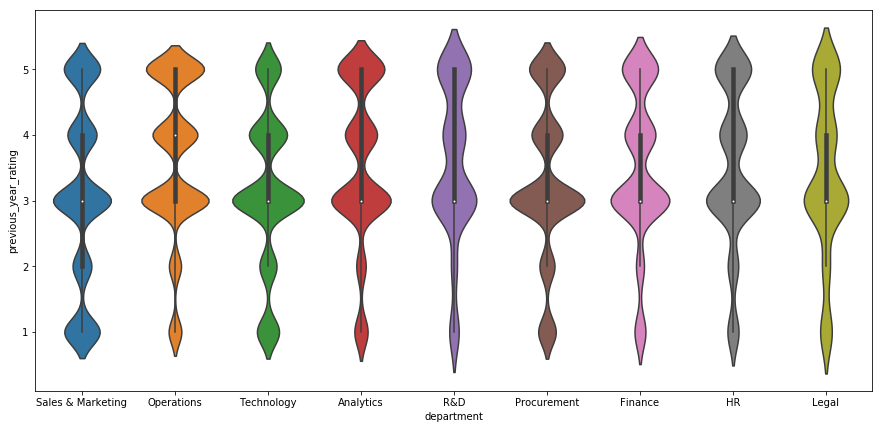

In [29]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['previous_year_rating'], data = train1)
plt.show()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


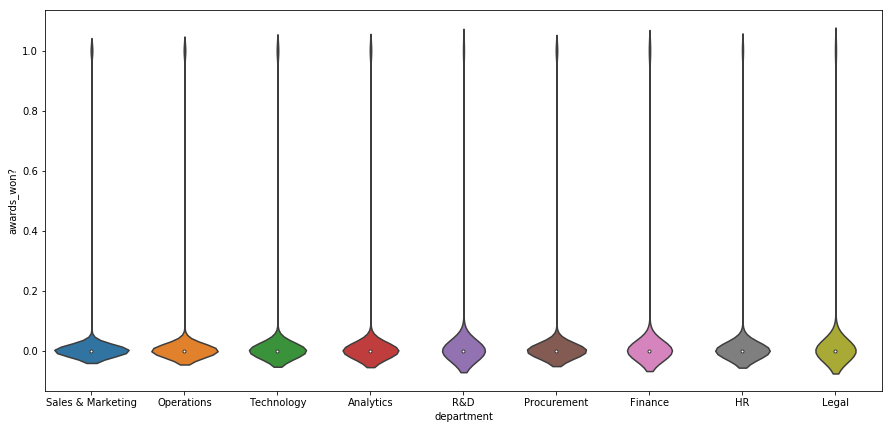

In [30]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['awards_won?'], data = train1)
plt.show()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


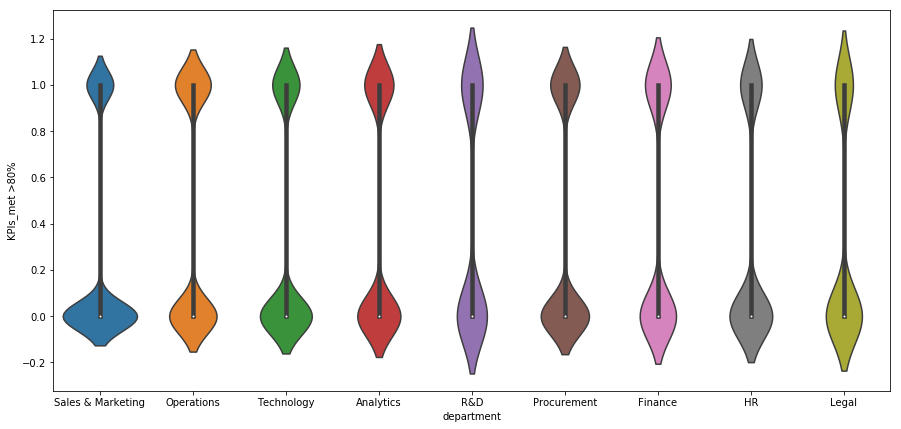

In [31]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['department'],y = train1['KPIs_met >80%'], data = train1)
plt.show()

## will try to get less Insights using Gender as data is highly Male Biased.

#### gender distribution in departments:

In [32]:
train1['gender'].value_counts(normalize = True)

m    0.702379
f    0.297621
Name: gender, dtype: float64

In [33]:
pd.crosstab(train1['gender'],train1['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
gender,,,,,,,,,
f,513,681,1006,149,4677,3287,57,3154,2788
m,4839,1855,1412,890,6671,3851,942,13686,4350


G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


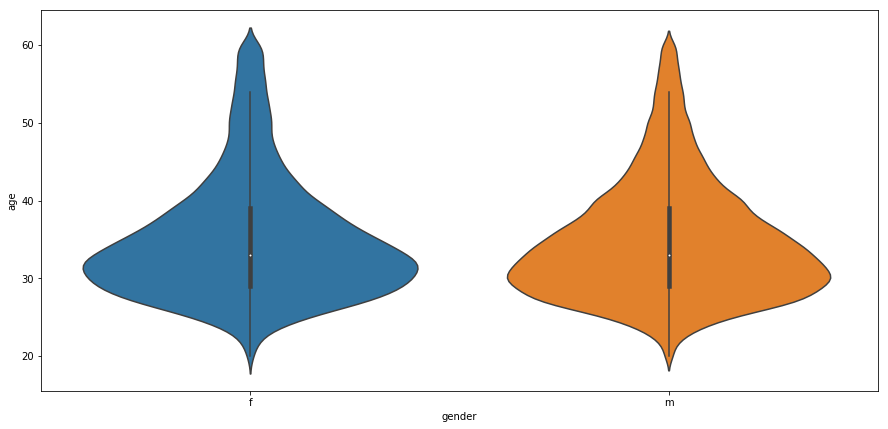

In [34]:
plt.figure(figsize = (15,7))
sns.violinplot(x = train1['gender'],y = train1['age'], data = train1)
plt.show()

In [35]:
train1.groupby(['gender']).age.mean().sort_values(ascending = True)

gender
m    34.722672
f    34.995647
Name: age, dtype: float64

In [36]:
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']


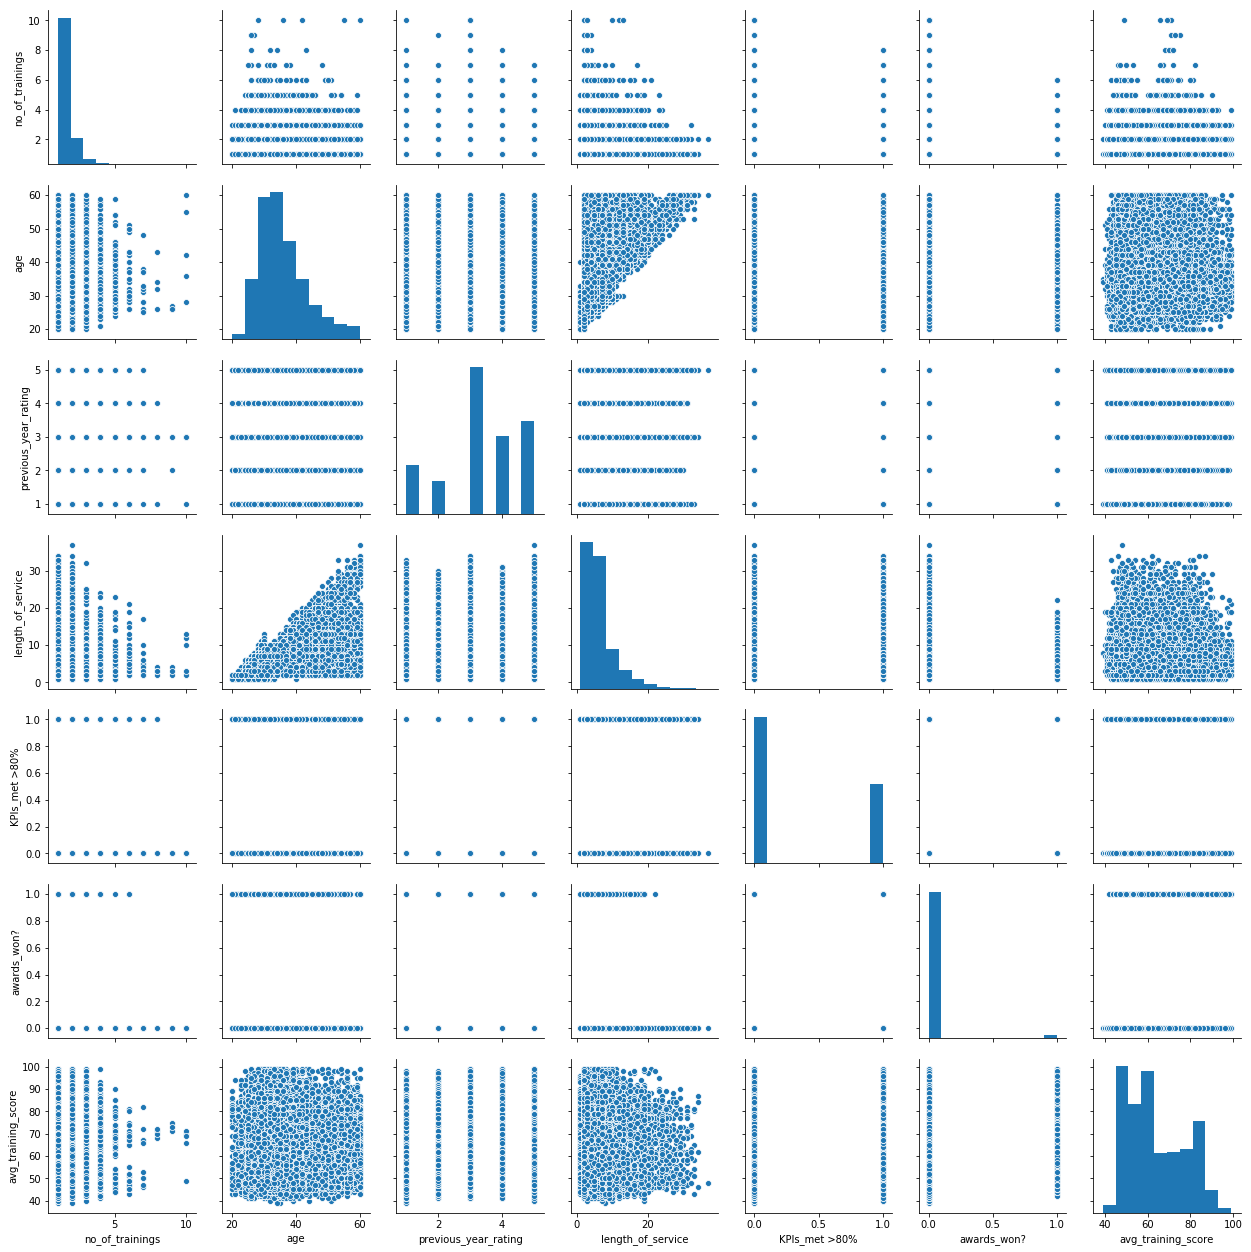

In [37]:
sns.pairplot(train1[features].dropna())

In [38]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


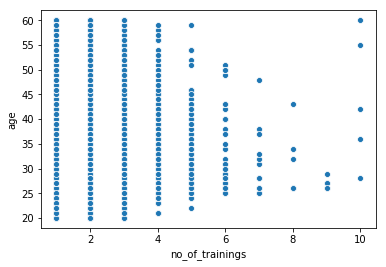

In [39]:
sns.scatterplot(y = train1['age'],x = train1['no_of_trainings'])

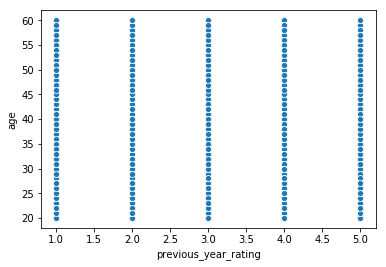

In [40]:
sns.scatterplot(y = train1['age'],x = train1['previous_year_rating'])

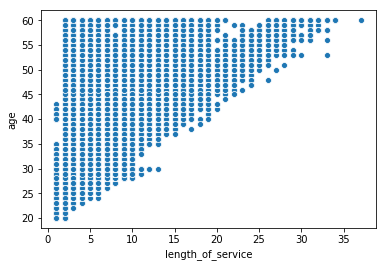

In [41]:
sns.scatterplot(y = train1['age'],x = train1['length_of_service'])

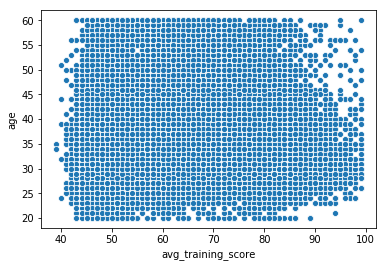

In [42]:
sns.scatterplot(y = train1['age'],x = train1['avg_training_score'],data = train1)

In [43]:
train1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

### Missing Value Treatment:

In [44]:
(train1.isnull().sum()).sort_values(ascending = False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
dtype: int64

In [45]:
exp1 = train1[train1['previous_year_rating'].isnull()]
exp1.shape

(4124, 13)

In [46]:
exp1[exp1['education'].isnull()].count()

department              385
region                  385
education                 0
gender                  385
recruitment_channel     385
no_of_trainings         385
age                     385
previous_year_rating      0
length_of_service       385
KPIs_met >80%           385
awards_won?             385
avg_training_score      385
is_promoted             385
dtype: int64

In [47]:
## the data where both education and previous year rating are null values found to be 385.

In [48]:
train1 = train1.interpolate()

In [49]:
train1['education'].mode()

0    Bachelor's
dtype: object

In [50]:
train1['education'] = train1['education'].fillna("Bachelor's")##filling the categorical value with mode value.

In [51]:
train1.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Test Data Missing Values Treatment:

In [52]:
test = pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [53]:
test1 = test.drop(['employee_id'],1)
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [54]:
test1.isnull().sum().sort_values(ascending = False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
dtype: int64

In [55]:
test1['previous_year_rating'] = test1['previous_year_rating'].fillna(test1['previous_year_rating'].median())

In [56]:
test1['education'].mode()

0    Bachelor's
dtype: object

In [57]:
test1['education'] = test1['education'].fillna("Bachelor's")

### Feature Engineering:

In [58]:
train1.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating    31
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [59]:
train1.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.059125,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.005792,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.059125,0.005792,1.000000,0.000459,0.332782,0.026490,0.070875,0.149188
length_of_service,-0.057275,0.657111,0.000459,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.332782,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.026490,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.070875,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.149188,-0.010670,0.221582,0.195871,0.181147,1.000000


In [60]:
train1.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating    31
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [61]:
pd.crosstab(train1['region'],train1['KPIs_met >80%']).head()

KPIs_met >80%,0,1
region,,
region_1,372,238
region_10,453,195
region_11,851,464
region_12,329,171
region_13,1692,956


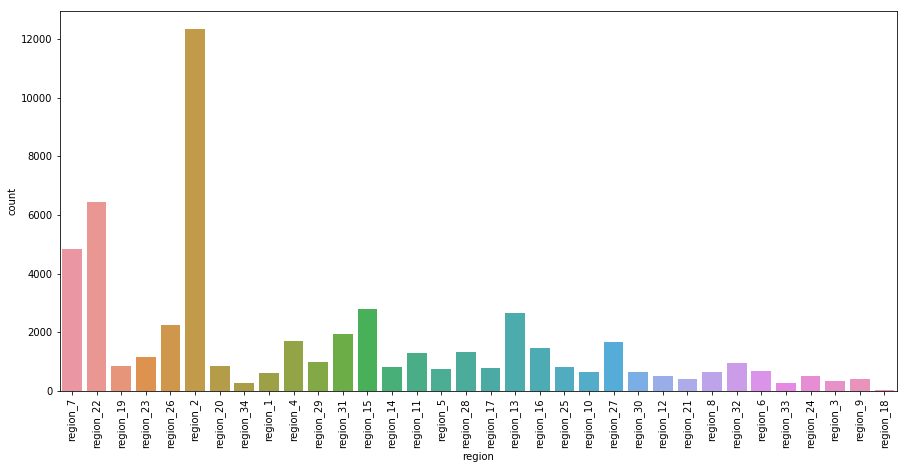

In [62]:
plt.figure(figsize = (15,7))
sns.countplot(train1['region'])
plt.xticks(rotation = 90)
plt.show()

In [63]:
## applying label encoding on nominal variables:


In [64]:
nominal = ['department','region','gender','recruitment_channel']


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# department
encode1 = pd.DataFrame(le.fit_transform(train1['department']))
encode1.head()
encode1.columns = ['department']

In [66]:
# region
encode2 = pd.DataFrame(le.fit_transform(train1['region']))
encode2.columns = ['region']
# gender
encode3 = pd.DataFrame(le.fit_transform(train1['gender']))
encode3.columns = ['gender']
# recruitment channel
encode4 = pd.DataFrame(le.fit_transform(train1['recruitment_channel']))
encode4.columns = ['recruitment_channel']
# dummy variables for education variable
dum1 = pd.get_dummies(train1['education'])
#dum1 = dum1.drop(['recruitment_channel'],1)
# concatenate
end = pd.concat([encode1,encode2,encode3,encode4,dum1],1)
end.head()

,department,region,gender,recruitment_channel,Bachelor's,Below Secondary,Master's & above
0,7,31,0,2,0,0,1
1,4,14,1,0,1,0,0
2,7,10,1,2,1,0,0
3,7,15,1,0,1,0,0
4,8,18,1,0,1,0,0


In [67]:
train2 = train1.drop(['department','region','gender','recruitment_channel','education'],1)
train2 = pd.concat([end,train2],1)
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
department              54808 non-null int32
region                  54808 non-null int32
gender                  54808 non-null int32
recruitment_channel     54808 non-null int32
Bachelor's              54808 non-null uint8
Below Secondary         54808 non-null uint8
Master's & above        54808 non-null uint8
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int32(4), int64(7), uint8(3)
memory usage: 4.3 MB


In [68]:
### working on test data:


In [69]:
le1 = LabelEncoder()
# department
enco1 = pd.DataFrame(le1.fit_transform(test1['department']))
enco1.columns = ['department']
# region
enco2 = pd.DataFrame(le1.fit_transform(test1['region']))
enco2.columns = ['region']
# gender
enco3 = pd.DataFrame(le1.fit_transform(test1['gender']))
enco3.columns = ['gender']
# recruitment channel
enco4 = pd.DataFrame(le1.fit_transform(test1['recruitment_channel']))
enco4.columns = ['recruitment_channel']
# dummy variables for education variable
dum2 = pd.get_dummies(test1['education'])
#dum1 = dum1.drop(['recruitment_channel'],1)
# concatenate
end1 = pd.concat([enco1,enco2,enco3,enco4,dum2],1)
end1.head()

,department,region,gender,recruitment_channel,Bachelor's,Below Secondary,Master's & above
0,8,18,1,2,1,0,0
1,2,28,0,0,1,0,0
2,7,4,1,0,1,0,0
3,5,11,0,0,1,0,0
4,1,21,1,2,1,0,0


In [70]:
test2 = test1.drop(['department','region','gender','recruitment_channel','education'],1)
test2 = pd.concat([end1,test2],1)
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
department              23490 non-null int32
region                  23490 non-null int32
gender                  23490 non-null int32
recruitment_channel     23490 non-null int32
Bachelor's              23490 non-null uint8
Below Secondary         23490 non-null uint8
Master's & above        23490 non-null uint8
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int32(4), int64(6), uint8(3)
memory usage: 1.7 MB


### Model Preparation

In [71]:
X = train2.drop(['is_promoted'],1)
y = train2['is_promoted']


In [72]:
## applyting SMOTE technique:;

In [73]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [74]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (54808, 14)
Shape of y: (54808,)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (38365, 14)
Number transactions y_train dataset:  (38365,)
Number transactions X_test dataset:  (16443, 14)
Number transactions y_test dataset:  (16443,)


In [76]:
print("Before OverSampling, counts of label in train '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label in train '0': {} \n".format(sum(y_train==0)))

print("Before OverSampling, counts of label in test '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label i test '0': {} \n".format(sum(y_test==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label in train '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label in train '0': {}\n".format(sum(y_train_res==0)))

print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label in test '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label in test '0': {}\n".format(sum(y_test_res==0)))

Before OverSampling, counts of label in train '1': 3260
Before OverSampling, counts of label in train '0': 35105 

Before OverSampling, counts of label in test '1': 1408
Before OverSampling, counts of label i test '0': 15035 

After OverSampling, the shape of train_X: (70210, 14)
After OverSampling, the shape of train_y: (70210,) 

After OverSampling, counts of label in train '1': 35105
After OverSampling, counts of label in train '0': 35105

After OverSampling, the shape of test_X: (30070, 14)
After OverSampling, the shape of test_y: (30070,) 

After OverSampling, counts of label in test '1': 15035
After OverSampling, counts of label in test '0': 15035



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [78]:
est = range(100,200,20)
train_f1 = []
for i in est:
    rf = RandomForestClassifier(n_estimators = i,random_state = 3)
    rf.fit(X_train_res,y_train_res)
    y_pred = rf.predict(X_train_res)
    print('Training Accuracy Score:',metrics.accuracy_score(y_train_res,y_pred))
    print('Training F1 Score is:',metrics.f1_score(y_train_res,y_pred))
    train_f1.append(metrics.f1_score(y_train_res,y_pred))

Training Accuracy Score: 0.9999572710440108
Training F1 Score is: 0.9999572704354143
Training Accuracy Score: 0.9999572710440108
Training F1 Score is: 0.9999572704354143
Training Accuracy Score: 0.9999572710440108
Training F1 Score is: 0.9999572704354143
Training Accuracy Score: 0.9999572710440108
Training F1 Score is: 0.9999572704354143
Training Accuracy Score: 0.9999572710440108
Training F1 Score is: 0.9999572704354143


In [79]:
est = range(100,200,20)
test_f1 = []
for i in est:
    rf = RandomForestClassifier(n_estimators = i,random_state = 5)
    rf.fit(X_train_res,y_train_res)
    y_pred = rf.predict(X_test_res)
    print('Testing Accuracy Score:',metrics.accuracy_score(y_test_res,y_pred))
    print('Testing F1 Score is:',metrics.f1_score(y_test_res,y_pred))
    test_f1.append(metrics.f1_score(y_test_res,y_pred))

Testing Accuracy Score: 0.9387429331559694
Testing F1 Score is: 0.9355312893742125
Testing Accuracy Score: 0.9392417692051879
Testing F1 Score is: 0.9360987723409464
Testing Accuracy Score: 0.9391752577319588
Testing F1 Score is: 0.9360109155791905
Testing Accuracy Score: 0.9394413036248753
Testing F1 Score is: 0.9363086285894162
Testing Accuracy Score: 0.9392085134685734
Testing F1 Score is: 0.9360749755210519


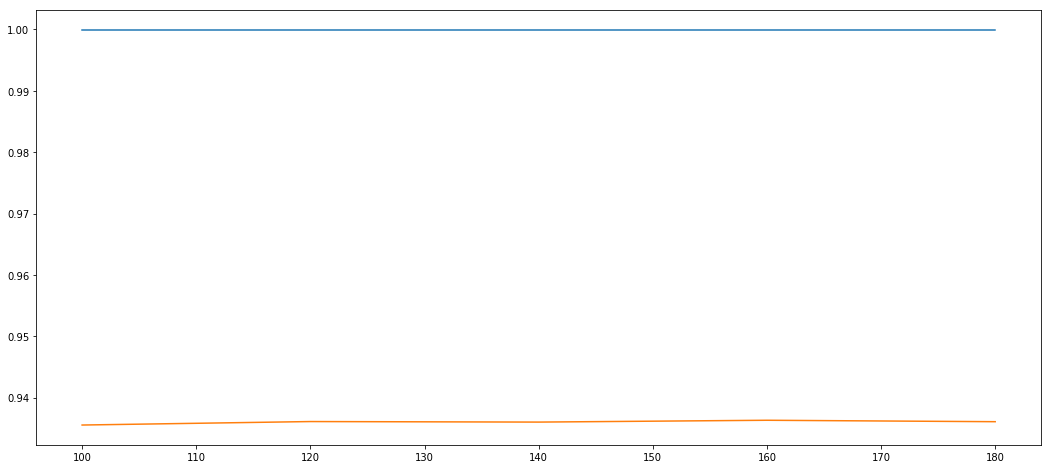

In [80]:
neig = np.arange(100,200,20)
#Plot
plt.figure(figsize=[18,8])
plt.plot(neig,train_f1, label = 'Training F1 Score')
plt.plot(neig,test_f1, label = 'Testing F1 Score')
plt.show()

In [81]:
## seeing the accuracy and F1 scores, i am choosing n_estimators = 160.


In [82]:
from sklearn.model_selection import GridSearchCV

rf_params = {'max_depth': [4,6,8,10],'criterion': ['gini','entropy'],'max_features': ['auto','sqrt','log2']}
rf1 = RandomForestClassifier(n_estimators = 160,random_state = 5)
rf_grid = GridSearchCV(rf1,rf_params,cv=5, n_jobs=-1, verbose= 1)
rf_grid.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8, 10], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
0.9254237288135593


In [84]:
## finally our random forest model parameters are decided and now applying on the test data:
#max_depth = 10, max_features = auto, and criteria gini 

In [85]:

feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values(by = 'importance', ascending=False)


In [86]:
feature_importances

,importance
KPIs_met >80%,0.209576
previous_year_rating,0.157373
avg_training_score,0.123741
gender,0.071501
recruitment_channel,0.064121
age,0.056178
length_of_service,0.055178
awards_won?,0.053883
region,0.047697
department,0.047405


In [87]:
## without scaled, label encoded,hypertuned model :


In [88]:
rf1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)
rf1.fit(X_train_res,y_train_res)
y_pred1 = rf1.predict(X_test_res)
print('F1 Score is:',metrics.f1_score(y_test_res,y_pred1))

F1 Score is: 0.9242277992277992


In [89]:
## now trying to scale the variables:

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.fit_transform(X_test_res)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns



In [91]:
rf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)
rf2.fit(X_train_scaled,y_train_res)
y_pred2 = rf2.predict(X_test_scaled)
print('F1 Score is:',metrics.f1_score(y_test_res,y_pred2))

F1 Score is: 0.7003729603729604


In [92]:
## preparing to submission:


In [93]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
department              23490 non-null int32
region                  23490 non-null int32
gender                  23490 non-null int32
recruitment_channel     23490 non-null int32
Bachelor's              23490 non-null uint8
Below Secondary         23490 non-null uint8
Master's & above        23490 non-null uint8
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int32(4), int64(6), uint8(3)
memory usage: 1.7 MB


In [94]:
#y_pred3 = rf1.predict(test2)

In [95]:
#labels = test['employee_id']
#solution = pd.DataFrame({'employee_id':labels,'is_promoted':y_pred3})
#solution.to_csv('rfsub1.csv',index = False)

In [96]:
## looking more way to improve the score. we will try to work on probability:


In [97]:
rf3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)
rf3.fit(X_train_res,y_train_res)
y_pred4 = rf3.predict_proba(X_test_res)

print('F1 score is:',metrics.f1_score(y_test_res,y_pred4))

F1 score is: 0.9242277992277992


In [99]:
y_test_res_df = pd.DataFrame(y_test_res)
y_pred4_df = pd.DataFrame(y_pred4)


In [114]:
#y_test_res_df

In [107]:
# Removing index for both dataframes to append them side by side 
y_pred4_df.reset_index(drop=True, inplace=True)
y_test_res_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_res_df,y_pred4_df],axis=1)
# Renaming the column 
y_pred_final.columns = ['is_promoted','is_promoted_prob']
# Rearranging the columns
y_pred_final.head()

,is_promoted,is_promoted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.is_promoted_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,is_promoted,is_promoted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','false positive rate','F1_Score'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.is_promoted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr = 1-speci
    fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fpr,fsc]
print(cutoff_df)

     prob  accuracy     sensi     speci  false positive rate  F1_Score
0.0   0.0  0.926904  0.962221  0.891586             0.108414  2.696217
0.1   0.1  0.926904  0.962221  0.891586             0.108414  2.696217
0.2   0.2  0.926904  0.962221  0.891586             0.108414  2.696217
0.3   0.3  0.926904  0.962221  0.891586             0.108414  2.696217
0.4   0.4  0.926904  0.962221  0.891586             0.108414  2.696217
0.5   0.5  0.926904  0.962221  0.891586             0.108414  2.696217
0.6   0.6  0.926904  0.962221  0.891586             0.108414  2.696217
0.7   0.7  0.926904  0.962221  0.891586             0.108414  2.696217
0.8   0.8  0.926904  0.962221  0.891586             0.108414  2.696217
0.9   0.9  0.926904  0.962221  0.891586             0.108414  2.696217
